# Simple Linear Regression  By:

# Mohamed Hamdy 

### Importing Libraries 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('student_scores.csv')

In [23]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Checking the Dataset shape
df.shape

(25, 2)

In [6]:
# Check if any null values 
df.isnull().any()

Hours     False
Scores    False
dtype: bool

In [9]:
# Check Duplicates
df.duplicated().sum()

0

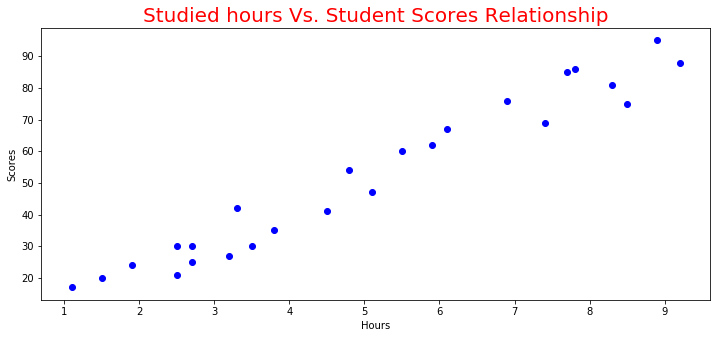

In [7]:
# plotting a scatterplot between hours and scores
plt.figure(figsize=(12,5))
plt.scatter(df['Hours'],df['Scores'],color='b')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Studied hours Vs. Student Scores Relationship',fontsize = 20,color='r');

##### Obviuosly from this scatterplot we can see that we have a strong positive relationship between studied hours and student scores as the hours increase the scores increase as well.

## Splitting the Data

In [49]:
# Defining X, y 
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values 

In [9]:
 # splitting the dataset by train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(20, 1)

In [11]:
# create a regressor mobject 

reg_mod = LinearRegression()

In [12]:
#Fitting the model

reg_mod.fit(X_train,y_train)

LinearRegression()

In [13]:
# Y prtediction 

y_pred = reg_mod.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [14]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

## Evaluating The Model 

In [15]:
# Printing all the evaluating parameters for the regressor 

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred,y_test) )

Mean absolute error: 3.92
Residual sum of squares (MSE): 18.94
R2-score: 0.96


In [16]:
# Regression Coefficient 
reg_mod.coef_

array([9.68207815])

In [17]:
# Regression y intercept 
reg_mod.intercept_

2.826892353899737

##### After fitting the regressor model we created we have got R2 score of 96% and MSE of 19 

In [18]:
# testing specific value on our regressor
hours = [[1.1]]
own_pred = reg_mod.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 1.1
Predicted Score = 13.477178323801004


### Plotting Regression Line [Training set]

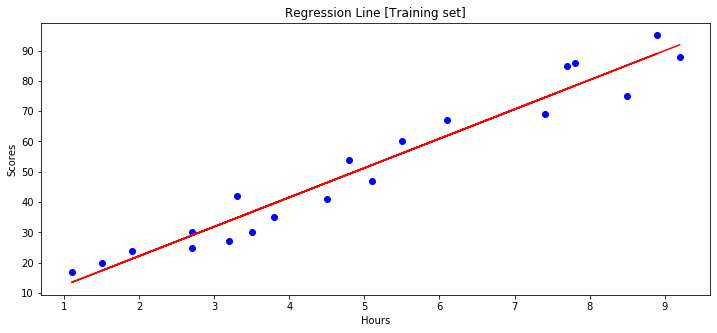

In [19]:

plt.figure(figsize=(12,5))
plt.scatter(X_train,y_train,color='b')
plt.plot(X_train,reg_mod.coef_[0]* X_train + reg_mod.intercept_,color='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line [Training set]');

### Plotting Regression Line [Testing set]

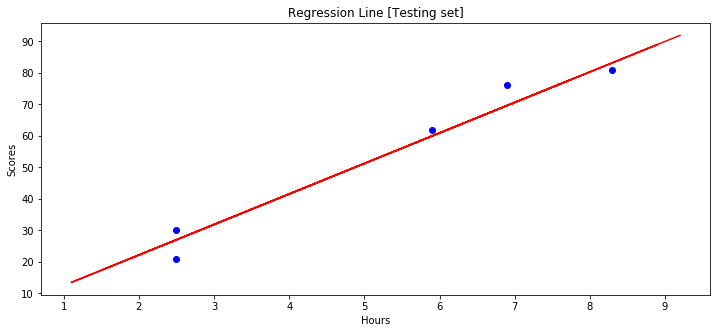

In [20]:
plt.figure(figsize=(12,5))
plt.scatter(X_test,y_test,color='b')
plt.plot(X_train,reg_mod.predict(X_train),color='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line [Testing set]');

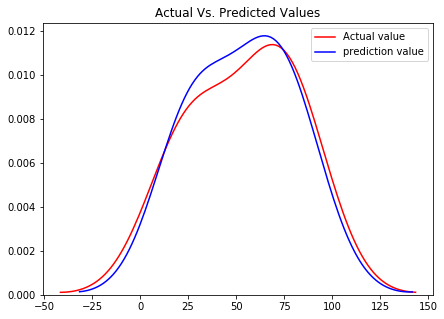

In [22]:
# Plotting Actual and predicted values
plt.figure(figsize=(7,5))
sns.distplot(y_test,hist=False,color='r',label = 'Actual value')
sns.distplot(y_pred,hist=False,color='b',label = 'prediction value')
plt.title('Actual Vs. Predicted Values');

### Optimizing The Regression Model

In [33]:
 #importing required libraries 
    
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [42]:
# create a pipeline for the regressor after applying degree 3 polynomial on the model 

poly_mod = make_pipeline(PolynomialFeatures(degree=3),LinearRegression(fit_intercept=False))

In [43]:
# Fitting the model 

poly_mod.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [44]:
# new prediction variable

new_pred = poly_mod.predict(X_test)

In [47]:
# Printing all the evaluating parameters for the regressor after applying the polynomial degree 3

print("Mean absolute error: %.2f" % np.mean(np.absolute(new_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((new_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(new_pred,y_test) )

Mean absolute error: 3.37
Residual sum of squares (MSE): 13.34
R2-score: 0.98


## Evaluating the model after Applying Polynomial Features 

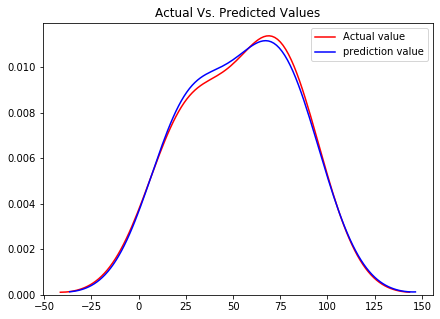

In [46]:
# Plotting Actual and predicted values
plt.figure(figsize=(7,5))
sns.distplot(y_test,hist=False,color='r',label = 'Actual value')
sns.distplot(new_pred,hist=False,color='b',label = 'prediction value')
plt.title('Actual Vs. Predicted Values');

### We can see that after applying polynomial features with degree three to the model, the R2_score has been increased to almost 98%.